### Evaluation Project - 6
# Loan Application Status Prediction
#### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Note: The link of the dataset is below. 

#### Downlaod Files:

    https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

### Importing required Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import power_transform,StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head() # Checking sample date using head (First 5 rows)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Checking total number of rows and columns available in our dataset

df.shape

(614, 13)

In [4]:
# Checking some info of our data (type null count etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### DATA CLEANING

In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n','=================================================================','\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [7]:
# Checking null values in our dataset

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Observation
===========================================================================================================================
- There are null values in our data set we will first get these null values updated with the help of mean, median and mode.
- Most of the columns in our data is catergorical data, need to update them into numberic with help of label encoder.
- We can remove 'Loan ID' column as data in the row is unique.
- In 'Dependents' column there is one column '3+' due to which our column type is reflecting as object, need to update it to intiger.

===========================================================================================================================

In [8]:
# Checking sample data by grouping them
print('>'*50, '\n')
print(df.Gender.value_counts())
print('>'*50, '\n')
print(df.Married.value_counts())
print('>'*50, '\n')
print(df.Dependents.value_counts())
print('>'*50, '\n')
print(df.Self_Employed.value_counts())
print('>'*50, '\n')
print(df.LoanAmount.value_counts())
print('>'*50, '\n')
print(df.Loan_Amount_Term.value_counts())
print('>'*50, '\n')
print (df.Credit_History.value_counts())
print('>'*50, '\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Male      489
Female    112
Name: Gender, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Yes    398
No     213
Name: Married, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No     500
Yes     82
Name: Self_Employed, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

1.0    475
0.0     89
Name: Credit_History, dtype: int

In [9]:
#Missing values handling using mean,mode,median

# Replacing values by mode

df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Replacing null values by median
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [10]:
# Encoding categorical below catergorical data
# ==========
# Gender             
# Married                
# Education
# Self_Employed      
# Property_Area      
# Loan_Status        
# =========

# Note here column 'Dependents' only have one objective data which we will replace manually.

LE = LabelEncoder()

VAR = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in VAR:
    df[i]=LE.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [11]:
# Replacing '3+' in Dependents column to 3

df["Dependents"]=df["Dependents"].map(lambda x:x.rstrip("+")) # removing + sign from dependant column
df["Dependents"]=df.Dependents.astype(float)     #To convert object type into float type


In [12]:
# Checking if 'Dependents' type is now changed to int.

df.value_counts('Dependents')

Dependents
0.0    360
1.0    102
2.0    101
3.0     51
dtype: int64

In [13]:
# Droping Loan id from our data set, all have unique values, which will not affect our dataset 
df = df.drop('Loan_ID', axis = True)

In [14]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## DATA PREPROCESSING AND EDA (EXPLORATORY DATA ANALYSIS)
**>>>>>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<>>>>>>>>>>>**

### Visualizing column wised data - Single column.

1    422
0    192
Name: Loan_Status, dtype: int64

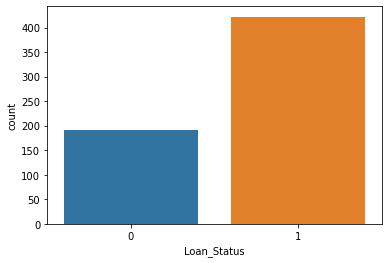

In [15]:
sns.countplot('Loan_Status', data = df)
df['Loan_Status'].value_counts()

Out of 614 people 422 received loan and 192 didnt received it.

1    502
0    112
Name: Gender, dtype: int64

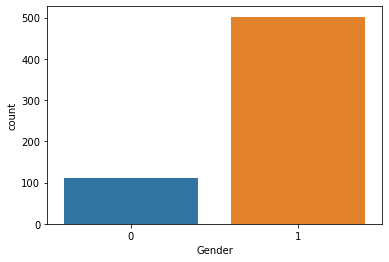

In [16]:
sns.countplot('Gender', data = df)
df['Gender'].value_counts()

Observation - There are 502 - Male and 112 - Female in our data who have taken loan. 

1    401
0    213
Name: Married, dtype: int64

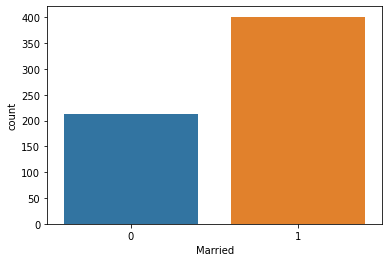

In [17]:
sns.countplot('Married', data = df)
df['Married'].value_counts()

Out of 614 people who have taken loan 401 are married and 213 are unmarried.

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

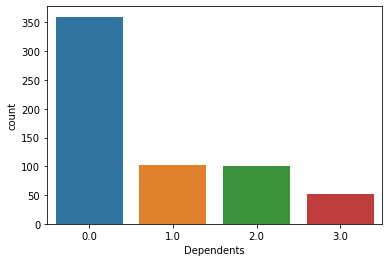

In [18]:
sns.countplot('Dependents', data = df)
df['Dependents'].value_counts()

Majority of people (360 people) only have 1 dependent, while 102, 101 and 51 people have 1,2 and more than 3 dependents respectively.

0    480
1    134
Name: Education, dtype: int64

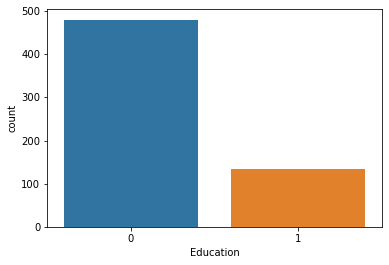

In [19]:
sns.countplot('Education', data = df)
df['Education'].value_counts()

Out of 614 people 480 people are Gratuate and 134 are non graduate.

0    532
1     82
Name: Self_Employed, dtype: int64

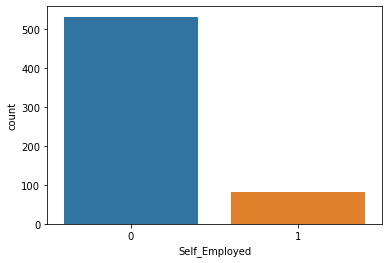

In [20]:
sns.countplot('Self_Employed', data = df)
df['Self_Employed'].value_counts()

Out of 614 are 82 are self employed while majority of people are in job.

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

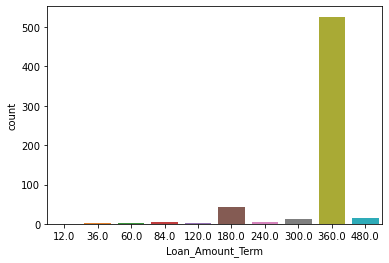

In [21]:
sns.countplot('Loan_Amount_Term', data = df)
df['Loan_Amount_Term'].value_counts()

Mostly loan tenure is of 360 months which is 3 years.

### Visualizing with target column.

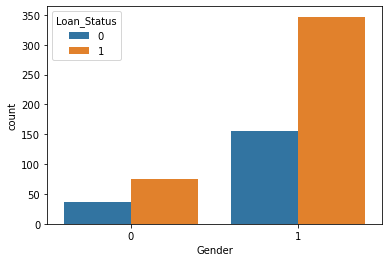

In [22]:
sns.countplot( x = 'Gender', data = df , hue = 'Loan_Status')
plt.show ()

Out of 112 female approx 80 recieved loan and 32 didn't receive loan. Out of 502 male approx 350 male received loan and remaining didnt receive loan.

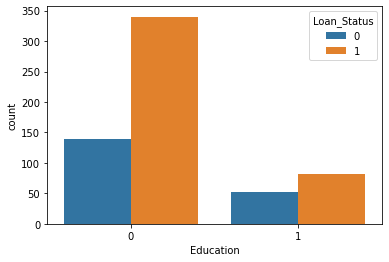

In [23]:
sns.countplot( x = 'Education', data = df , hue = 'Loan_Status')
plt.show ()

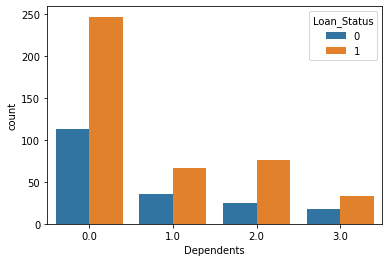

In [24]:
sns.countplot( x = 'Dependents', data = df , hue = 'Loan_Status')
plt.show ()

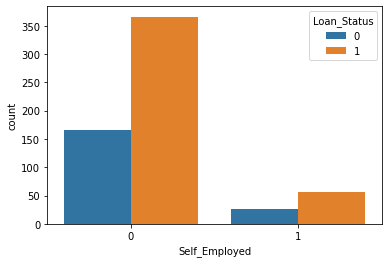

In [25]:
sns.countplot( x = 'Self_Employed', data = df , hue = 'Loan_Status')
plt.show ()

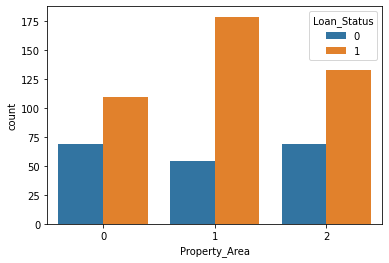

In [26]:
sns.countplot( x = 'Property_Area', data = df , hue = 'Loan_Status')
plt.show ()

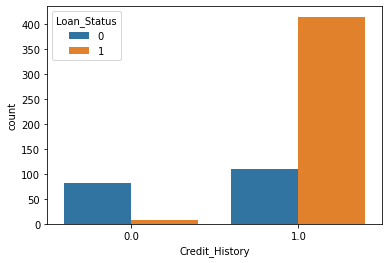

In [27]:
sns.countplot( x = 'Credit_History', data = df , hue = 'Loan_Status')
plt.show ()

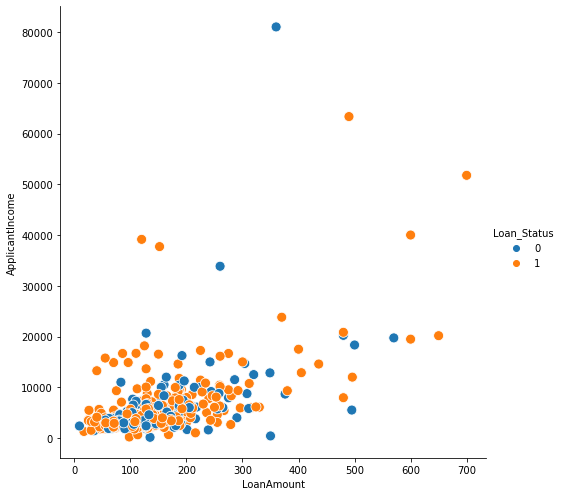

In [28]:
sns.relplot( x = 'LoanAmount' , y= 'ApplicantIncome',data = df , hue = 'Loan_Status', s = 100, height = 7)
plt.show ()

Loan amount is directly related to income of the application, where income increase loan amount also increase in same propotion.

### Lets check skewness of our data

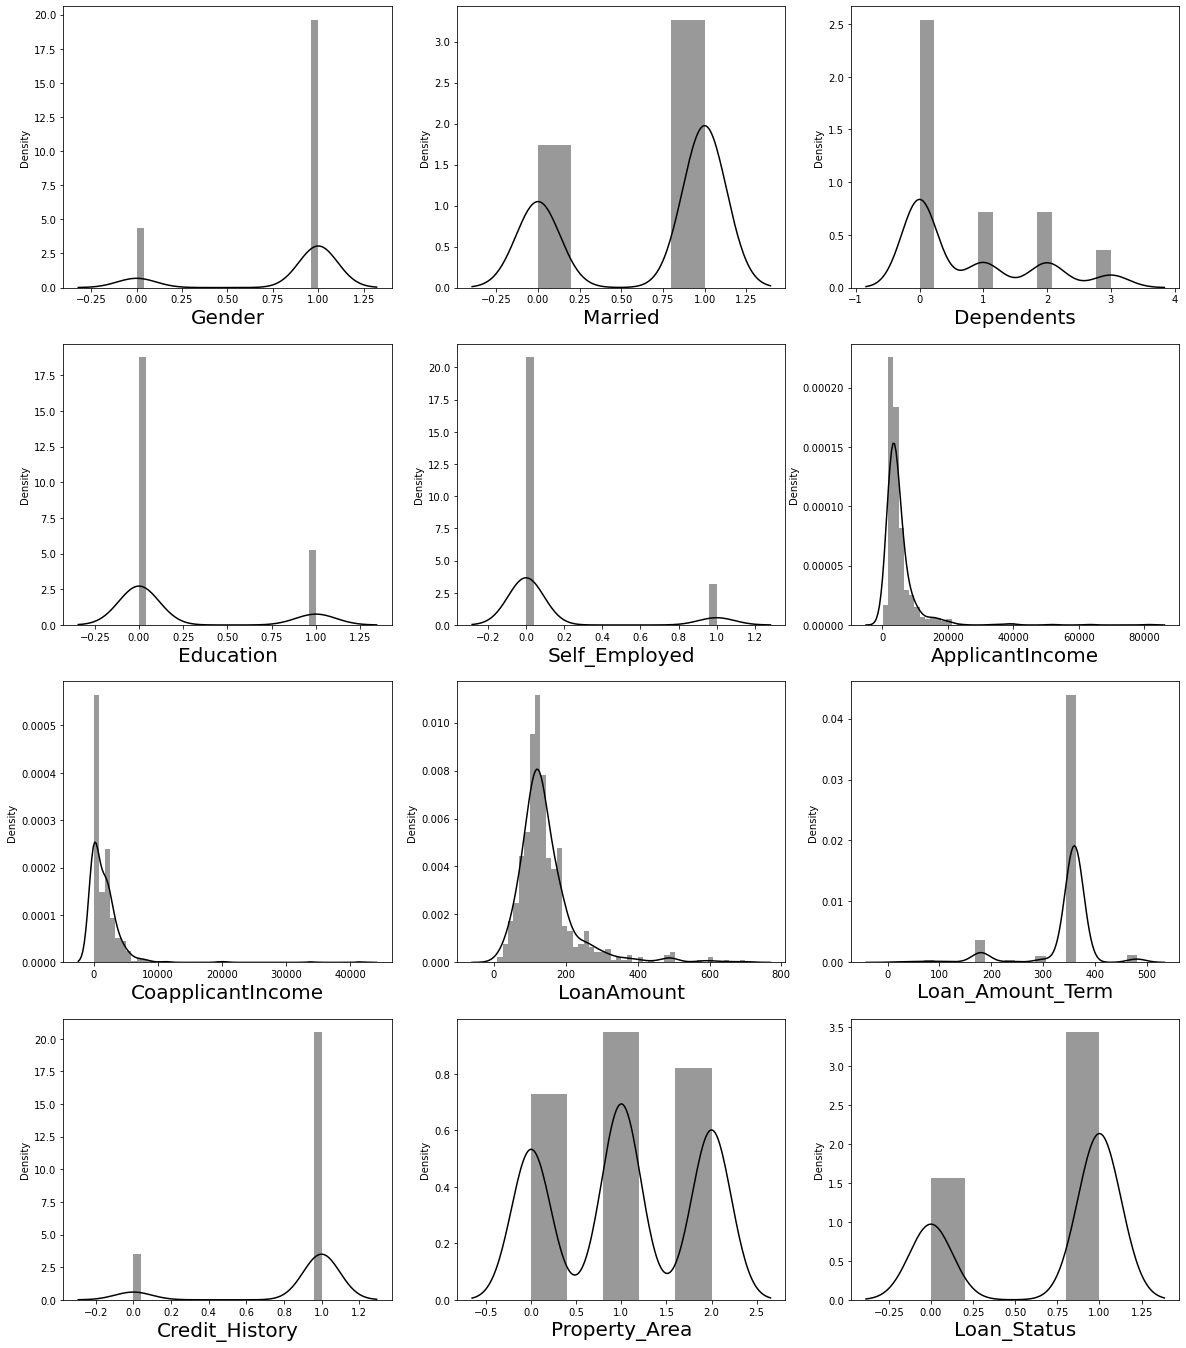

In [29]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN
plt.figure(figsize = (20,30))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot (df[column], color = 'black')
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

### Checking outliers

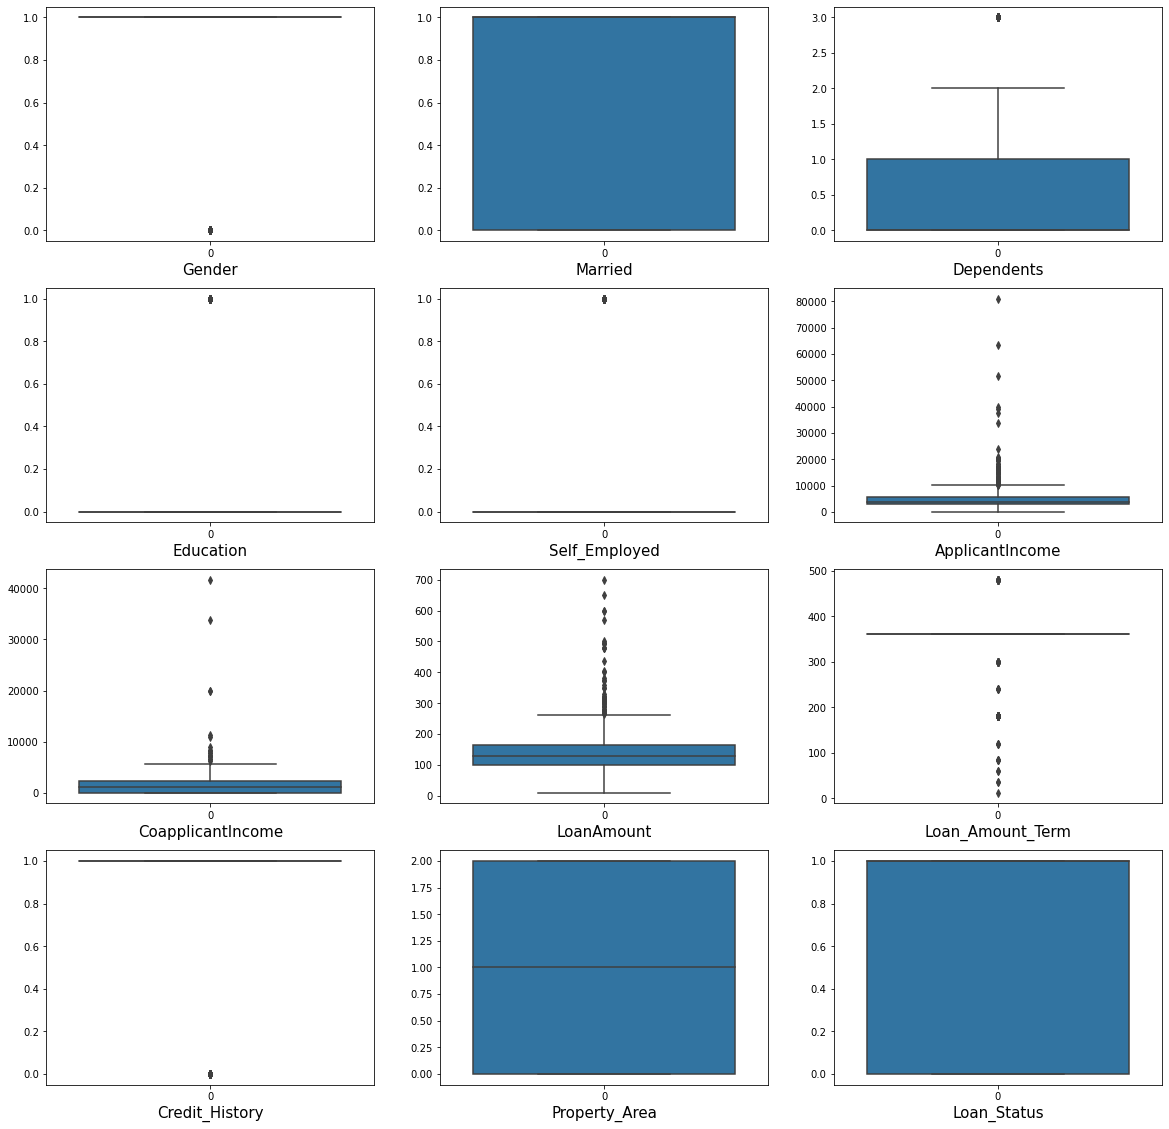

In [30]:
# Visualizing the outliers using boxplot

plt.figure (figsize = (20,25))
graph = 1
for column in df:
    if graph <= 14:
        plt.subplot(5,3, graph)
        ax = sns.boxplot (data = df[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show ()

### Observation
===========================================================================================================================
1. Applicant income,Coapplication income, Loan amount and Loan amount term columsn have to many outliers.
2. There are columns Gender, Education, Self Employed and creadit history only have 2 outcomes so it doesnt have outliers.
3. We will further remove outlier of columns using Z-Score method.

==========================================================================================================================

## Removing Outliers

### Z - Score

In [31]:
# 
(np.abs(zscore(df)<3)).all()

Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area         True
Loan_Status           True
dtype: bool

In [32]:
scores = np.abs(zscore(df))
t = 3
np.where(scores<3)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64),
 array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))

In [33]:
# Checking data shape before and after removing outliers

new_df = df[(scores<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(614, 12)
(577, 12)


In [34]:
# Checking Data Loss percentage.
dataloss = (614-577)*100/614
print ('DATA LOSS = ', dataloss, '%')

DATA LOSS =  6.026058631921824 %


### Correlation of DATA

In [35]:
new_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.158431,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.164365,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135554,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.149369,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121562,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.439526,-0.052101,0.036664,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.312426,-0.058726,-0.011102,-0.093505,0.045009
LoanAmount,0.158431,0.164365,0.135554,-0.149369,0.121562,0.439526,0.312426,1.000000,0.039696,0.009694,-0.078882,-0.030169
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.052101,-0.058726,0.039696,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.036664,-0.011102,0.009694,0.027392,1.000000,-0.008121,0.560936


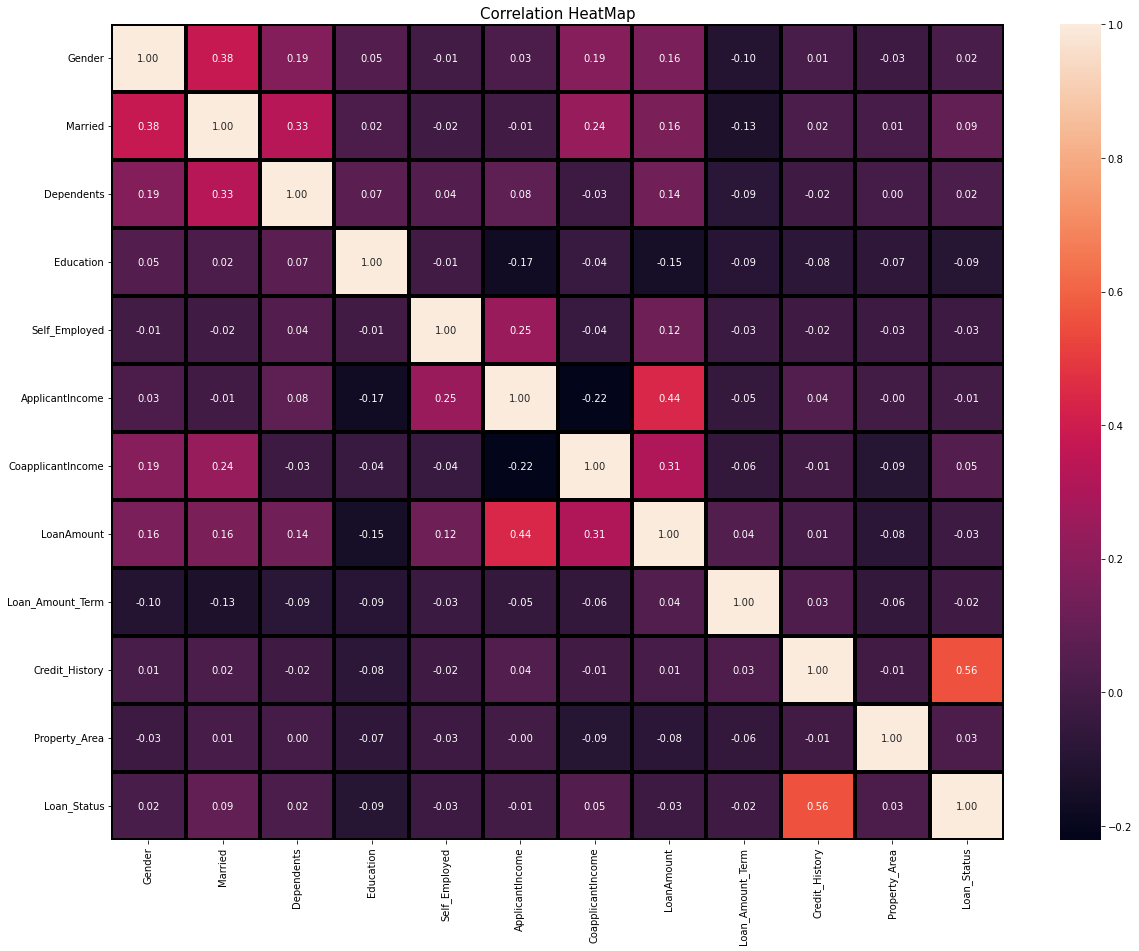

In [36]:
# Ploting heatmap to check correlation of our data

plt.figure (figsize = (20,15))
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(new_df.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()

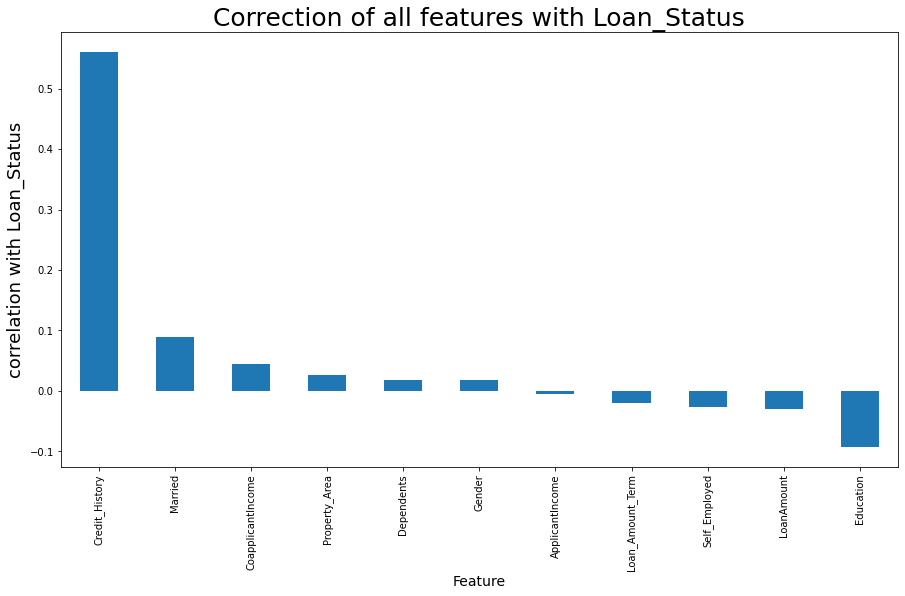

In [37]:
# Checking correlation of all features with income

plt.figure(figsize = (15,8))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot.bar()
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("correlation with Loan_Status", fontsize = 18)
plt.title ("Correction of all features with Loan_Status", fontsize = 25)
plt.show()

### Observation
===========================================================================================================================
1. Credit_history is most positively correlation with our targe variable. (Loan Status)
2. Column 'Loan amount term', 'Sefl employed', 'loan amount' and education are inversly propotional to loan status
3. Marriage coapplication inoce property area are also positively related with our target column.

===========================================================================================================================

### Removing Skewness

In [38]:
new_df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [39]:
X=new_df.drop("Loan_Status",axis=1)
Y=new_df["Loan_Status"]
X # Checking data in X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2


In [40]:
# Checking DATA in y
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [41]:
# Removing skewness
X_new= np.sqrt(X[X.columns])

In [42]:
X_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,76.478755,0.000000,11.313708,18.973666,1.0,1.414214
1,1.0,1.0,1.000000,0.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,0.000000
2,1.0,1.0,0.000000,0.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,1.414214
3,1.0,1.0,0.000000,1.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,1.414214
4,1.0,0.0,0.000000,0.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,1.414214
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,53.851648,0.000000,8.426150,18.973666,1.0,0.000000
610,1.0,1.0,1.732051,0.0,0.0,64.078077,0.000000,6.324555,13.416408,1.0,0.000000
611,1.0,1.0,1.000000,0.0,0.0,89.844310,15.491933,15.905974,18.973666,1.0,1.414214
612,1.0,1.0,1.414214,0.0,0.0,87.080423,0.000000,13.674794,18.973666,1.0,1.414214


In [43]:
# Transforming data

X_new=power_transform(X_new)   
X_new

array([[ 0.47713685, -1.36251079, -0.81649549, ...,  0.13076798,
         0.41851254,  1.10166321],
       [ 0.47713685,  0.73393914,  1.04393001, ...,  0.13076798,
         0.41851254, -1.41497784],
       [ 0.47713685,  0.73393914, -0.81649549, ...,  0.13076798,
         0.41851254,  1.10166321],
       ...,
       [ 0.47713685,  0.73393914,  1.04393001, ...,  0.13076798,
         0.41851254,  1.10166321],
       [ 0.47713685,  0.73393914,  1.28826074, ...,  0.13076798,
         0.41851254,  1.10166321],
       [-2.09583477, -1.36251079, -0.81649549, ...,  0.13076798,
        -2.38941464,  0.1555155 ]])

## Scaling data using Standard Scaler

In [44]:
### Need to Sale the DATA

std=StandardScaler()
X_scaled=pd.DataFrame(std.fit_transform(X_new),columns=X.columns)
X_scaled


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.816495,-0.541961,-0.380580,0.683009,-1.123200,0.001339,0.130768,0.418513,1.101663
1,0.477137,0.733939,1.043930,-0.541961,-0.380580,0.236029,0.747018,0.001339,0.130768,0.418513,-1.414978
2,0.477137,0.733939,-0.816495,-0.541961,2.627567,-0.527023,-1.123200,-1.437842,0.130768,0.418513,1.101663
3,0.477137,0.733939,-0.816495,1.845150,-0.380580,-0.792426,0.895177,-0.152993,0.130768,0.418513,1.101663
4,0.477137,-1.362511,-0.816495,-0.541961,-0.380580,0.730044,-1.123200,0.238804,0.130768,0.418513,1.101663
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.816495,-0.541961,-0.380580,-0.587331,-1.123200,-1.294098,0.130768,0.418513,-1.414978
573,0.477137,0.733939,1.414106,-0.541961,-0.380580,0.036476,-1.123200,-2.335004,-2.563235,0.418513,-1.414978
574,0.477137,0.733939,1.043930,-0.541961,-0.380580,1.281968,0.197613,1.843626,0.130768,0.418513,1.101663
575,0.477137,0.733939,1.288261,-0.541961,-0.380580,1.165002,-1.123200,0.976112,0.130768,0.418513,1.101663


## MODEL BUILDING

### Classicification problem
- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- SVC
- AdaBoostClassifier

### Checking best random state

In [45]:


bestrandom = 0
max_score = 0
#models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

for i in range(0,500):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.30,random_state=i)
    
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    predrf=LR.predict(X_test)
    acc=accuracy_score(Y_test,predrf)
    
    print('Accuracy score is ',acc,'Random state',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
            
        print('Accuracy',max_score,'Random State',i)


Accuracy score is  0.8333333333333334 Random state 0
Accuracy 0.8333333333333334 Random State 0
Accuracy score is  0.8045977011494253 Random state 1
Accuracy score is  0.8160919540229885 Random state 2
Accuracy score is  0.8103448275862069 Random state 3
Accuracy score is  0.7758620689655172 Random state 4
Accuracy score is  0.7931034482758621 Random state 5
Accuracy score is  0.8275862068965517 Random state 6
Accuracy score is  0.8045977011494253 Random state 7
Accuracy score is  0.7873563218390804 Random state 8
Accuracy score is  0.8103448275862069 Random state 9
Accuracy score is  0.8160919540229885 Random state 10
Accuracy score is  0.8045977011494253 Random state 11
Accuracy score is  0.8850574712643678 Random state 12
Accuracy 0.8850574712643678 Random State 12
Accuracy score is  0.8103448275862069 Random state 13
Accuracy score is  0.7701149425287356 Random state 14
Accuracy score is  0.8275862068965517 Random state 15
Accuracy score is  0.8160919540229885 Random state 16
Accur

In [46]:
print('Best Accuracy is',max_score,'Best Random State',bestrandom)

Best Accuracy is 0.896551724137931 Best Random State 494


### Train-Test-Split

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.30,random_state=494)
print(X_train.shape)
print(Y_train.shape)

(403, 11)
(403,)


#### Building Model using all below classification algorithms

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=494)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(X_train,Y_train)
    predlr=model.predict(X_train)
    print("Model Name",model)
    print("Accuracy",accuracy_score(Y_train,predlr)*100)
    print(confusion_matrix(Y_train,predlr))
    print(classification_report(Y_train,predlr))
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>','\n')

Model Name LogisticRegression()
Accuracy 78.16377171215882
[[ 57  80]
 [  8 258]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.56       137
           1       0.76      0.97      0.85       266

    accuracy                           0.78       403
   macro avg       0.82      0.69      0.71       403
weighted avg       0.80      0.78      0.76       403

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name KNeighborsClassifier()
Accuracy 80.64516129032258
[[ 71  66]
 [ 12 254]]
              precision    recall  f1-score   support

           0       0.86      0.52      0.65       137
           1       0.79      0.95      0.87       266

    accuracy                           0.81       403
   macro avg       0.82      0.74      0.76       403
weighted avg       0.81      0.81      0.79       403

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name DecisionTreeClassifier()
Accuracy 100.0

### Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr = cross_val_score(model,X_scaled,Y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('===========================================')

Model Name : LogisticRegression()
Cross validation score is:  81.98200899550224
Mean score : 81.98200899550224
STD : 2.7790198124777885
Model Name : KNeighborsClassifier()
Cross validation score is:  77.64767616191904
Mean score : 77.64767616191904
STD : 3.0416919300334
Model Name : DecisionTreeClassifier()
Cross validation score is:  72.44677661169415
Mean score : 72.44677661169415
STD : 3.036818882565646
Model Name : RandomForestClassifier()
Cross validation score is:  78.8575712143928
Mean score : 78.8575712143928
STD : 2.0834812263986775
Model Name : SVC()
Cross validation score is:  81.80809595202398
Mean score : 81.80809595202398
STD : 3.020375233771556
Model Name : AdaBoostClassifier()
Cross validation score is:  78.34632683658171
Mean score : 78.34632683658171
STD : 2.766917644742775


## HyperParameter tuning
### GridSearchCV method

### RandomforestClassifier mothod

In [50]:
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [52]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [53]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [54]:
Loan = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Loan.fit(X_train, Y_train)
pred = Loan.predict(X_train)
acc=accuracy_score(Y_train,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 87.34491315136476 %


### Kneighbours method

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=494)
KNC=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
grid=GridSearchCV(KNC,parameters)
grid.fit(X_train,Y_train)
print("Best parameters :",grid.best_params_)

Best parameters : {'n_neighbors': 9}


In [56]:
KNC=KNeighborsClassifier(n_neighbors=9)
score=cross_val_score(KNC,X_scaled,Y,cv=5)

KNC.fit(X_train,Y_train)
pred=KNC.predict(X_test)
acc_score=accuracy_score(Y_test,pred)
print("Accuracy score",(acc_score)*100)
print("Cross validation score is: ", score.mean()*100)
print("Mean score :", (score.mean())*100)
print("STD :", score.std()*100)


Accuracy score 89.08045977011494
Cross validation score is:  80.59370314842577
Mean score : 80.59370314842577
STD : 2.6883461436746816



### ROC CURVE


In [57]:
clf=SVC(random_state=494)
clf.fit(X_test,Y_test)

SVC(random_state=494)

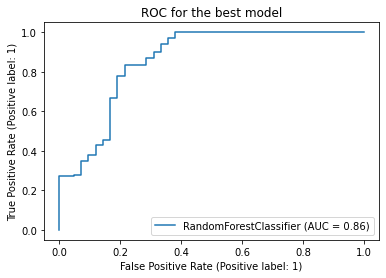

In [58]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

plot_roc_curve(Loan, X_test, Y_test)
plt.title("ROC for the best model")
plt.show()

In [59]:
# Building a predictive system using randomforest classifier

input_data = (1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0)

# changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediting the lable for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = Loan.predict (input_data_reshaped)
print (prediction)
print ('===')

if prediction == 1:
    print ('Loan Given')
else:
    print ('Loan not Given')

print ('========================')

[1]
===
Loan Given


In [60]:
import joblib

In [61]:
joblib.dump(Loan.predict,'Loan_Prediction.obj')

['Loan_Prediction.obj']